<a href="https://colab.research.google.com/github/shaliha223/DSA_class_activities/blob/main/Pandas_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Import pandas, numpy

In [1]:
import numpy as np
import pandas as pd

2) Load dataset using pd.read_csv()

In [2]:
url = "https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/IMDB-Movie-Data.csv"
df = pd.read_csv(url)

3) Display: shape, head, column names, datatypes, missing value

In [3]:
print("shape:",df.shape)
print("head: \n",df.head())
print("datatyes \n",type(df))

shape: (1000, 12)
head: 
    Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S..

In [4]:
df.isna().sum()

,0
Rank,0
Title,0
Genre,0
Description,0
Director,0
Actors,0
Year,0
Runtime (Minutes),0
Rating,0
Votes,0


In [5]:
df.info()# data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


4) Check and remove duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df[df.duplicated()]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore


there is no duplicated value

5) Rename columns ("Title" > "Movie_Title")

In [8]:
df = df.rename(columns = {"Title" : "Movie_Title"})
df.columns

Index(['Rank', 'Movie_Title', 'Genre', 'Description', 'Director', 'Actors',
       'Year', 'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

6) Get unique genres

In [9]:
df["Genre"].unique()

array(['Action,Adventure,Sci-Fi', 'Adventure,Mystery,Sci-Fi',
       'Horror,Thriller', 'Animation,Comedy,Family',
       'Action,Adventure,Fantasy', 'Comedy,Drama,Music', 'Comedy',
       'Action,Adventure,Biography', 'Adventure,Drama,Romance',
       'Adventure,Family,Fantasy', 'Biography,Drama,History',
       'Animation,Adventure,Comedy', 'Action,Comedy,Drama',
       'Action,Thriller', 'Biography,Drama', 'Drama,Mystery,Sci-Fi',
       'Adventure,Drama,Thriller', 'Drama', 'Crime,Drama,Horror',
       'Action,Adventure,Drama', 'Drama,Thriller',
       'Action,Adventure,Comedy', 'Action,Horror,Sci-Fi',
       'Adventure,Drama,Sci-Fi', 'Action,Adventure,Western',
       'Comedy,Drama', 'Horror', 'Adventure,Drama,Fantasy',
       'Action,Crime,Thriller', 'Action,Crime,Drama',
       'Adventure,Drama,History', 'Crime,Horror,Thriller',
       'Drama,Romance', 'Comedy,Drama,Romance', 'Horror,Mystery,Thriller',
       'Crime,Drama,Mystery', 'Drama,Romance,Thriller',
       'Drama,History,T

7) Extract number of genres per movie

In [10]:
df['Num_Genres'] = df['Genre'].apply(lambda x: len(x.split(',')))

print(df[["Movie_Title", "Genre","Num_Genres"]])

                 Movie_Title                     Genre  Num_Genres
0    Guardians of the Galaxy   Action,Adventure,Sci-Fi           3
1                 Prometheus  Adventure,Mystery,Sci-Fi           3
2                      Split           Horror,Thriller           2
3                       Sing   Animation,Comedy,Family           3
4              Suicide Squad  Action,Adventure,Fantasy           3
..                       ...                       ...         ...
995     Secret in Their Eyes       Crime,Drama,Mystery           3
996          Hostel: Part II                    Horror           1
997   Step Up 2: The Streets       Drama,Music,Romance           3
998             Search Party          Adventure,Comedy           2
999               Nine Lives     Comedy,Family,Fantasy           3

[1000 rows x 3 columns]


8) Handle missing values in 'Revenue (Millions)' and 'Metascore

<Axes: >

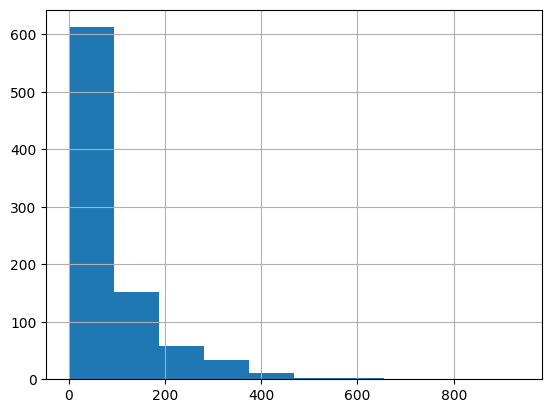

In [11]:
df['Revenue (Millions)'].hist()

In [12]:
df['Revenue (Millions)'] = df['Revenue (Millions)'].fillna(df['Revenue (Millions)'].median())#here median is used because the histogram is left skewed

<Axes: >

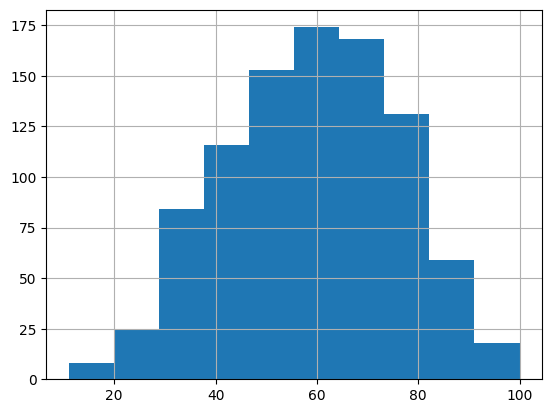

In [13]:
df['Metascore'].hist()

In [14]:
df['Metascore'] = df['Metascore'].fillna(df['Metascore'].mean())#hear mean is used because the histogram is approximately normal

9) Top 5 movies by Rating

In [15]:
df.sort_values(by="Rating",ascending=False).head()

,Rank,Movie_Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Num_Genres
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.000000,3
80,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.000000,3
117,118,Dangal,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,11.15,58.985043,3
36,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.000000,3
249,250,The Intouchables,"Biography,Comedy,Drama",After he becomes a quadriplegic from a paragli...,Olivier Nakache,"François Cluzet, Omar Sy, Anne Le Ny, Audrey F...",2011,112,8.6,557965,13.18,57.000000,3


10) Movies with highest/lowest revenue

In [19]:
df1 = df.sort_values(by="Revenue (Millions)",ascending=False)

print("The movies with highest revenue\n",df1[["Movie_Title","Revenue (Millions)"]].head() )
print("The movies with lowest revenue\n",df1[["Movie_Title","Revenue (Millions)"]].tail() )

The movies with highest revenue
                                    Movie_Title  Revenue (Millions)
50  Star Wars: Episode VII - The Force Awakens              936.63
87                                      Avatar              760.51
85                              Jurassic World              652.18
76                                The Avengers              623.28
54                             The Dark Knight              533.32
The movies with lowest revenue
           Movie_Title  Revenue (Millions)
321          Lovesong                0.01
27         Dead Awake                0.01
677       Love, Rosie                0.01
68          Wakefield                0.01
231  A Kind of Murder                0.00


11) Avg. rating by Director

In [20]:
df.groupby('Director')['Rating'].mean()

,Rating
Director,
Aamir Khan,8.50
Abdellatif Kechiche,7.80
Adam Leon,6.50
Adam McKay,7.00
Adam Shankman,6.30
...,...
Xavier Dolan,7.55
Yimou Zhang,6.10
Yorgos Lanthimos,7.20


12) Movies per year

In [27]:
df.groupby('Year')['Movie_Title'].count()

,Movie_Title
Year,
2006,44
2007,53
2008,52
2009,51
2010,60
2011,63
2012,64
2013,91
2014,98


13) Movies with rating > 8 & revenue > 100M

In [29]:
df2 = df[(df['Revenue (Millions)']>100) & (df['Rating']>8)]
df2[["Movie_Title","Revenue (Millions)","Rating"]]

,Movie_Title,Revenue (Millions),Rating
0,Guardians of the Galaxy,333.13,8.1
6,La La Land,151.06,8.3
36,Interstellar,187.99,8.6
50,Star Wars: Episode VII - The Force Awakens,936.63,8.1
54,The Dark Knight,533.32,9.0
67,Mad Max: Fury Road,153.63,8.1
74,Zootopia,341.26,8.1
76,The Avengers,623.28,8.1
77,Inglourious Basterds,120.52,8.3
80,Inception,292.57,8.8


14) Group by Director: avg Rating, Revenue

In [31]:
df.groupby('Director')[['Rating','Revenue (Millions)']].mean()

,Rating,Revenue (Millions)
Director,,
Aamir Khan,8.50,1.2000
Abdellatif Kechiche,7.80,2.2000
Adam Leon,6.50,47.9850
Adam McKay,7.00,109.5350
Adam Shankman,6.30,78.6650
...,...,...
Xavier Dolan,7.55,25.7375
Yimou Zhang,6.10,45.1300
Yorgos Lanthimos,7.20,4.4050


15) Group by Year: count, avg Rating

In [32]:
result = df.groupby('Year').agg(
    Movie_Count=('Movie_Title', 'count'),
    Avg_Rating=('Rating', 'mean')
).reset_index()

print(result.head())#.agg() → to apply multiple aggregations

   Year  Movie_Count  Avg_Rating
0  2006           44    7.125000
1  2007           53    7.133962
2  2008           52    6.784615
3  2009           51    6.960784
4  2010           60    6.826667


16) Create a new column Profitability:
a) Revenue divided by Duration
b) Find top 10 most profitable movies

In [38]:
df[' Profitability'] = df['Revenue (Millions)']/ df['Runtime (Minutes)']
df.head()

,Rank,Movie_Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Num_Genres,Profitability
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,3,2.753140
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,3,1.019839
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,2,1.180513
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,3,2.502963
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,3,2.642439


In [40]:
df3 = df.sort_values(by=" Profitability",ascending=False)
df3.head(10)

,Rank,Movie_Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Num_Genres,Profitability
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0,3,6.886985
85,86,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0,3,5.259516
119,120,Finding Dory,"Animation,Adventure,Comedy","The friendly but forgetful blue tang fish, Dor...",Andrew Stanton,"Ellen DeGeneres, Albert Brooks,Ed O'Neill, Kai...",2016,97,7.4,157026,486.29,77.0,3,5.013299
87,88,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0,3,4.694506
76,77,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0,2,4.358601
15,16,The Secret Life of Pets,"Animation,Adventure,Comedy",The quiet life of a terrier named Max is upend...,Chris Renaud,"Louis C.K., Eric Stonestreet, Kevin Hart, Lake...",2016,87,6.6,120259,368.31,61.0,3,4.233448
688,689,Toy Story 3,"Animation,Adventure,Comedy",The toys are mistakenly delivered to a day-car...,Lee Unkrich,"Tom Hanks, Tim Allen, Joan Cusack, Ned Beatty",2010,103,8.3,586669,414.98,92.0,3,4.028932
12,13,Rogue One,"Action,Adventure,Sci-Fi",The Rebel Alliance makes a risky move to steal...,Gareth Edwards,"Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",2016,133,7.9,323118,532.17,65.0,3,4.001278
174,175,Frozen,"Animation,Adventure,Comedy",When the newly crowned Queen Elsa accidentally...,Chris Buck,"Kristen Bell, Idina Menzel, Jonathan Groff, Jo...",2013,102,7.5,451894,400.74,74.0,3,3.928824
797,798,Despicable Me 2,"Animation,Adventure,Comedy","When Gru, the world's most super-bad turned su...",Pierre Coffin,"Steve Carell, Kristen Wiig, Benjamin Bratt, Mi...",2013,98,7.4,304837,368.05,62.0,3,3.755612


17) Create a column that categorizes movies by rating:
a) Rating < 6: Poor
b) 6 ≤ Rating < 7.5: Average
c) Rating ≥ 7.5: Excellent

In [41]:
df['Rating_Category'] = np.where(df['Rating'] < 6, 'Poor',
                         np.where(df['Rating'] < 7.5, 'Average', 'Excellent'))

In [42]:
df.head()

,Rank,Movie_Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Num_Genres,Profitability,Rating_Category
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,3,2.753140,Excellent
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,3,1.019839,Average
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,2,1.180513,Average
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,3,2.502963,Average
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,3,2.642439,Average


18) Create a custom function to score movies based on:
i) Apply row['Rating'] * 10 + row['Revenue (Millions)'] as High score
Apply a function to dataset to assign the score

In [45]:
def movie_score(row):
    return row['Rating'] * 10 + row['Revenue (Millions)']

df['High_Score'] = df.apply(movie_score, axis=1)

df.head()

,Rank,Movie_Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Num_Genres,Profitability,Rating_Category,High_Score
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,3,2.753140,Excellent,414.13
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,3,1.019839,Average,196.46
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,2,1.180513,Average,211.12
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,3,2.502963,Average,342.32
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,3,2.642439,Average,387.02
